Distribución muestral de un estadístico
====

* Un **estadístico muestral** es una métrica calculada sobre una **muestra** de datos obtenida de una población.

* La **distribución de los datos** hace referencia a la distribución de frecuencia de los valores individuales en una muestra o conjunto de datos.

* La **distribución muestral** hace referencia a la distribución de frecuencias de un **estadístico muestral** calculado sobre muchas muestras.

* El **Teorema del límite central** postula la distribución muestral tiende a tomar una forma normal a medida que el tamaño de la muestra crece.

----

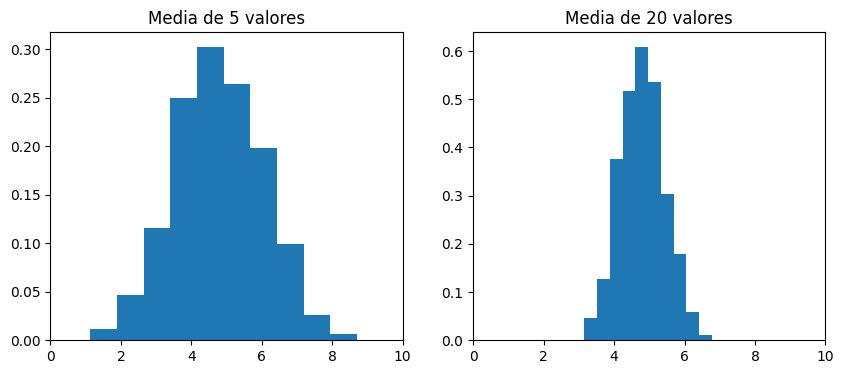

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Generación de una muestra de 1000 numeros aleatorios uniformes entre 0 y 10
sample_data = pd.Series(np.random.uniform(low=0, high=10, size=1000))

# Generación de 1000 muestras de la media de 5 numeros pertenecientes a sample_data
sample_mean_05 = [sample_data.sample(5).mean() for _ in range(1000)]

# Generación de 1000 muestras de la media de 20 numeros pertenecientes a sample_data
sample_mean_20 = [sample_data.sample(20).mean() for _ in range(1000)]

# Histogramas de las muestras de las medias
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(sample_mean_05, density=True)
plt.xlim(0, 10)
plt.title("Media de 5 valores")

plt.subplot(1, 2, 2)
plt.hist(sample_mean_20, density=True)
plt.xlim(0, 10)
plt.title("Media de 20 valores")

plt.show()

* El **error estándar** es la variabilidad de un estadístico muestral sobre muchas muestras. Se calcula como:
$$
\text{SE} = \frac{\sigma}{\sqrt{N}}
$$
donde:

  * $N$ es el tamaño de la muestra. Para nuestro caso 5 y 20.
  
  * $\sigma$ es la desviación estándar de la distribución de donde provienen los datos.

In [2]:
np.std(sample_mean_05)

1.2670319139259512

In [3]:
np.std(sample_mean_20)

0.6262910685320281

---

Formalmente el **teorema del límite central** postula lo siguiente:

* Considere $N$ variables aleatorias con pdf $p(x_i)$, con media $\mu$ y varianza $\sigma^2$.

* Las variables $X_i$ son independientes e identicamente distribuidas.

* Sea
$$
S_N = \sum_{i=1}^N X_i
$$

* El teorema del límite central postula que a medida que $N$ incrementa, la distribución de $S_N$ tiende a una distribución normal, tal que:
$$
\frac{\bar{X}-\mu}{\sigma / \sqrt{N}}
$$
tiende a una distribución normal estandar con:
$$
\bar{X}=\frac{1}{N} \sum_{i=1}^N x_i
$$
Notese que la desviación estándar de la distribución es $\sigma / \sqrt{N}$.

---

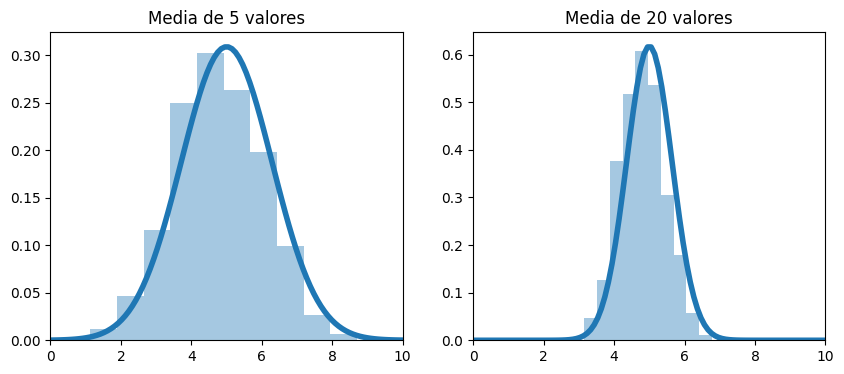

In [4]:
from scipy.stats import norm

# Para la distribución uniforme definida en [a, b]:
mu = 5  # (a + b) / 2
s2 = (10 - 0) ** 2 / 12  # (b - a)^2 /12
x = np.linspace(0, 10, 100)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(sample_mean_05, density=True, alpha=0.4)
plt.xlim(0, 10)
plt.title("Media de 5 valores")
plt.plot(x, norm.pdf(x, loc=mu, scale=np.sqrt(s2)/np.sqrt(5)), color='tab:blue', lw=4)


plt.subplot(1, 2, 2)
plt.hist(sample_mean_20, density=True, alpha=0.4)
plt.xlim(0, 10)
plt.title("Media de 20 valores")
plt.plot(x, norm.pdf(x, loc=mu, scale=np.sqrt(s2)/np.sqrt(20)), color='tab:blue', lw=4)

plt.show()

In [5]:
# Desviación estándar para la media de 5 valores
np.sqrt(s2)/np.sqrt(5)

1.2909944487358056

In [6]:
# Desviación estándar para la media de 20 valores
np.sqrt(s2)/np.sqrt(20)

0.6454972243679028